In [1]:
import numpy as np
import dill
import seaborn as sns
import pandas as pd

# Comparing over seeds

In [4]:
# load data
# with open('comparing_over_seeds/200_seeds_2500_trajs.pkl', 'rb') as f:
#     results = dill.load(f)
#     results = [res for res in results if not np.isnan(res[1][-1])] # cannot use res[1][-1] == np.nan
#     print(len(results))

with open('comparing_over_noises/2.0.pkl', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])]
    print('# of valid results:', len(results))

# of valid results: 97


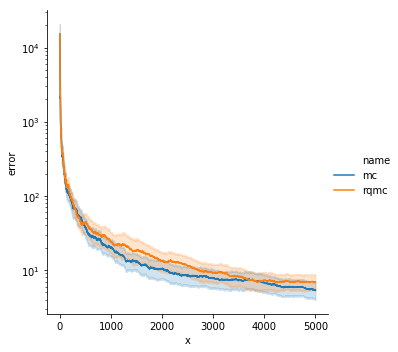

In [5]:
mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': results[i][0],
         'x': np.arange(len(results[i][0]))}) for i in range(len(results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': results[i][1],
         'x': np.arange(len(results[i][1]))}) for i in range(len(results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# One seed

In [25]:
#with open('one_seed/H-1.num_traj-2500.0.pkl', 'rb') as f:
#with open('one_seed/compare_0_100k.pkl', 'rb') as f:

H = 20

mc_data = []
rqmc_data = []

for i in range(20):
    with open('one_seed/H-{}.num_traj-100000.{}.pkl'.format(H, i), 'rb') as f:
        results = dill.load(f)
        if np.isnan(results['rqmc_errors'][-1]): 
            print('{} is broken!'.format(i))
        else:
            mc_data.append(
                pd.DataFrame({
                    'name': 'mc',
                    'error': results['mc_errors'],
                    'x': np.arange(len(results['mc_errors'])),
                })
            )
            rqmc_data.append(
                pd.DataFrame({
                    'name': 'rqmc',
                    'error': results['rqmc_errors'],
                    'x': np.arange(len(results['rqmc_errors'])),
                })
            )
        
data = pd.concat(mc_data + rqmc_data)

2 is broken!
7 is broken!
13 is broken!


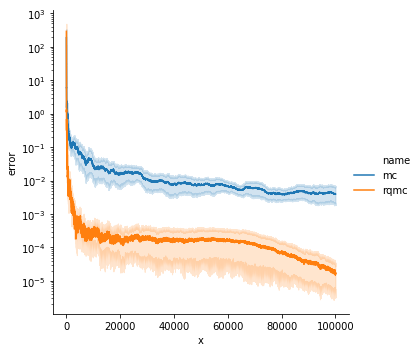

In [26]:
plot = sns.relplot(x='x', y='error', hue='name', kind='line', data=data)
plot.set(yscale='log')

# Debug

In [11]:
import torch
from torch.optim import SGD

model = torch.nn.Linear(10, 10)
optimizer = SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

model.bias.requires_grad = False

for name, param in model.named_parameters():
    print(name, param)

x = torch.randn(5, 10)
g = torch.randn(5, 10)

loss = torch.nn.functional.mse_loss(x, g)

optimizer.zero_grad()
loss.backward()
optimizer.step()

for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.1934, -0.2758, -0.1425, -0.1616, -0.3068, -0.0743,  0.2823,  0.1410,
          0.0495,  0.2070],
        [ 0.1081, -0.0497, -0.0402,  0.1652, -0.1893, -0.0879,  0.1987, -0.0668,
          0.0091,  0.2850],
        [-0.0523, -0.0862,  0.1250, -0.2178,  0.0176,  0.2996,  0.0648,  0.0271,
          0.0990, -0.1839],
        [ 0.1761, -0.2515,  0.2376,  0.0828, -0.0556,  0.2213,  0.2378,  0.2849,
          0.1870, -0.0220],
        [ 0.1420, -0.2498,  0.1630,  0.0941,  0.2684,  0.1991, -0.1635,  0.1753,
          0.2791,  0.1415],
        [ 0.0059, -0.2648,  0.2324,  0.0913, -0.0097,  0.0066,  0.0373,  0.0405,
         -0.1373, -0.0539],
        [ 0.2882,  0.0784,  0.0264, -0.1116,  0.2229, -0.1447, -0.1129, -0.0699,
          0.2869,  0.0132],
        [-0.2146,  0.1866, -0.1010,  0.0016, -0.1902, -0.0917, -0.1621,  0.0455,
          0.2752, -0.0336],
        [ 0.2609, -0.3011,  0.3098, -0.0103,  0.0185,  0.1859, -0.2402, -0.2952,
         -0.1301, 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [29]:
import torch
import numpy as np

a = torch.Tensor([0, 1, 2, -np.inf])
print(a == float('-inf'))

tensor([0, 0, 0, 1], dtype=torch.uint8)
